In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
import quandl

In [85]:
import seaborn as ssn
ssn.set()

In [25]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2020-01-01')

In [26]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
googl = quandl.get('WIKI/GOOGL.11',start_date=start,end_date=end)
msft = quandl.get('WIKI/MSFT.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

## Normalized Price

In [27]:
aapl.iloc[0]['Adj. Close'] #cumulative return

103.86395724039

In [28]:
for stock_df in (aapl,googl,msft,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [29]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2015-01-02,103.863957,1.000000
2015-01-05,100.937944,0.971828
2015-01-06,100.947444,0.971920
2015-01-07,102.362951,0.985548
2015-01-08,106.295968,1.023415


## Allocation
suppose the allocation for the total portfolio is:
* 30% Apple
* 25% Google
* 20% Microsoft
* 25% Amazon

In [30]:
for stock_df, allo in zip([aapl,googl,msft,amzn],[.3,.25,.2,.25]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [31]:
googl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2015-01-02,529.55,1.000000,0.250000
2015-01-05,519.46,0.980946,0.245237
2015-01-06,506.64,0.956737,0.239184
2015-01-07,505.15,0.953923,0.238481
2015-01-08,506.91,0.957247,0.239312


* if we invest 2 million dollars

In [32]:
for stock_df in (aapl,googl,msft,amzn):
    stock_df['Position Values']=stock_df['Allocation']*2000000

In [33]:
googl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2015-01-02,529.55,1.000000,0.250000,500000.000000
2015-01-05,519.46,0.980946,0.245237,490473.043150
2015-01-06,506.64,0.956737,0.239184,478368.426022
2015-01-07,505.15,0.953923,0.238481,476961.571145
2015-01-08,506.91,0.957247,0.239312,478623.359456


In [34]:
all_position_value=[aapl['Position Values'],googl['Position Values'],msft['Position Values'],amzn['Position Values']]
portfolio_val=pd.concat(all_position_value,axis=1)

In [35]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2015-01-02,600000.000000,500000.000000,400000.000000,500000.000000
2015-01-05,583097.045642,490473.043150,396278.870830,489741.345780
2015-01-06,583151.925364,478368.426022,390504.704876,478558.926488
2015-01-07,591329.003933,476961.571145,395466.210436,483631.531181
2015-01-08,614049.208817,478623.359456,407100.085543,486937.637754


In [36]:
portfolio_val.columns=['APPL Pos','GOOGL Pos','MSFT Pos','AMZN Pos']


In [37]:
portfolio_val.head()

,APPL Pos,GOOGL Pos,MSFT Pos,AMZN Pos
Date,,,,
2015-01-02,600000.000000,500000.000000,400000.000000,500000.000000
2015-01-05,583097.045642,490473.043150,396278.870830,489741.345780
2015-01-06,583151.925364,478368.426022,390504.704876,478558.926488
2015-01-07,591329.003933,476961.571145,395466.210436,483631.531181
2015-01-08,614049.208817,478623.359456,407100.085543,486937.637754


In [38]:
portfolio_val['Total Pos']=portfolio_val.sum(axis=1)

In [39]:
portfolio_val.head()

,APPL Pos,GOOGL Pos,MSFT Pos,AMZN Pos,Total Pos
Date,,,,,
2015-01-02,600000.000000,500000.000000,400000.000000,500000.000000,2.000000e+06
2015-01-05,583097.045642,490473.043150,396278.870830,489741.345780,1.959590e+06
2015-01-06,583151.925364,478368.426022,390504.704876,478558.926488,1.930584e+06
2015-01-07,591329.003933,476961.571145,395466.210436,483631.531181,1.947388e+06
2015-01-08,614049.208817,478623.359456,407100.085543,486937.637754,1.986710e+06


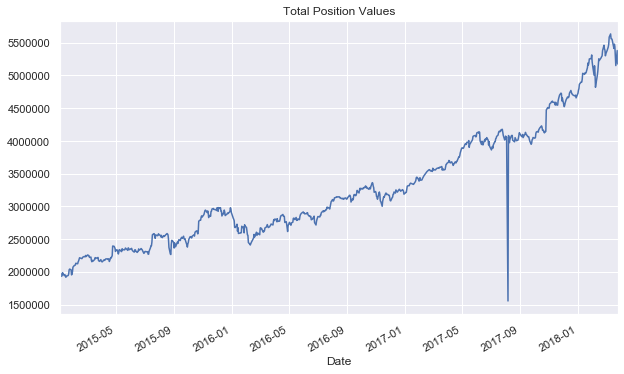

In [47]:
portfolio_val['Total Pos'].plot(figsize=(10,6))
plt.title('Total Position Values');

Text(0.5, 1.0, 'Individual Postion Value')

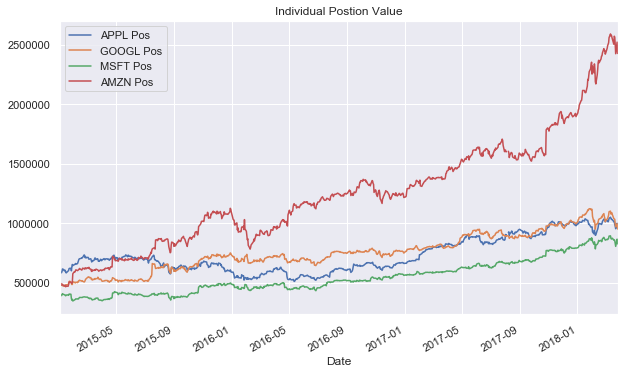

In [48]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,6));
plt.title('Individual Postion Value')

### Portfolio Statistics

In [50]:
portfolio_val['Daily Return']=portfolio_val['Total Pos'].pct_change(1)

In [51]:
portfolio_val.head()

,APPL Pos,GOOGL Pos,MSFT Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2015-01-02,600000.000000,500000.000000,400000.000000,500000.000000,2.000000e+06,NaN
2015-01-05,583097.045642,490473.043150,396278.870830,489741.345780,1.959590e+06,-0.020205
2015-01-06,583151.925364,478368.426022,390504.704876,478558.926488,1.930584e+06,-0.014802
2015-01-07,591329.003933,476961.571145,395466.210436,483631.531181,1.947388e+06,0.008704
2015-01-08,614049.208817,478623.359456,407100.085543,486937.637754,1.986710e+06,0.020192


In [53]:
portfolio_val['Daily Return'].mean()

0.002486841916860284

In [54]:
portfolio_val['Daily Return'].std()

0.062334588519082995

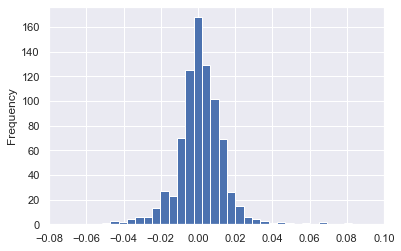

In [70]:
portfolio_val['Daily Return'].plot(kind='hist',bins=500,xlim=(-0.08,0.1))

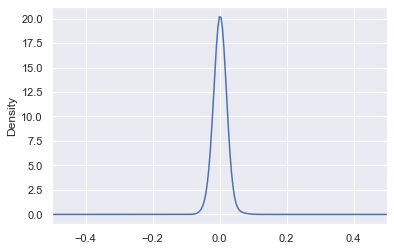

In [72]:
portfolio_val['Daily Return'].plot(kind='kde',xlim=(-0.5,0.5))

In [74]:
cumulative_return=100*(portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)
cumulative_return

158.75312934849228

* Sharpe Return

In [76]:
SR= portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.03989505627520051

In [108]:
#Annual sharpe return
ASR=(252**0.5)*SR
ASR

0.6333143846706443

coding for portfolio 

In [92]:
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [93]:
stocks=pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.head()

,Adj. Close,Adj. Close,Adj. Close,Adj. Close
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [95]:
stocks.columns=['APPL','CISCO','IBM','AMZN']
stocks.head()

,APPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [96]:
# mean daily return
stocks.pct_change(1).mean()

APPL     0.000750
CISCO    0.000599
IBM      0.000081
AMZN     0.001328
dtype: float64

In [99]:
#check the correlation
stocks.pct_change(1).corr()

,APPL,CISCO,IBM,AMZN
APPL,1.000000,0.301990,0.297498,0.235487
CISCO,0.301990,1.000000,0.424672,0.284470
IBM,0.297498,0.424672,1.000000,0.258492
AMZN,0.235487,0.284470,0.258492,1.000000


* Returns

In [101]:
#log return
log_return=np.log(stocks/stocks.shift(1))
log_return.head()

,APPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


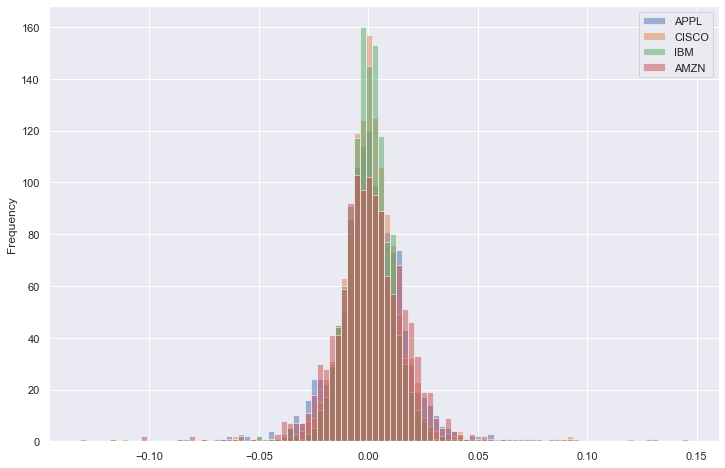

In [107]:
log_return.plot(kind='hist',bins=100,figsize=(12,8),alpha=0.5)

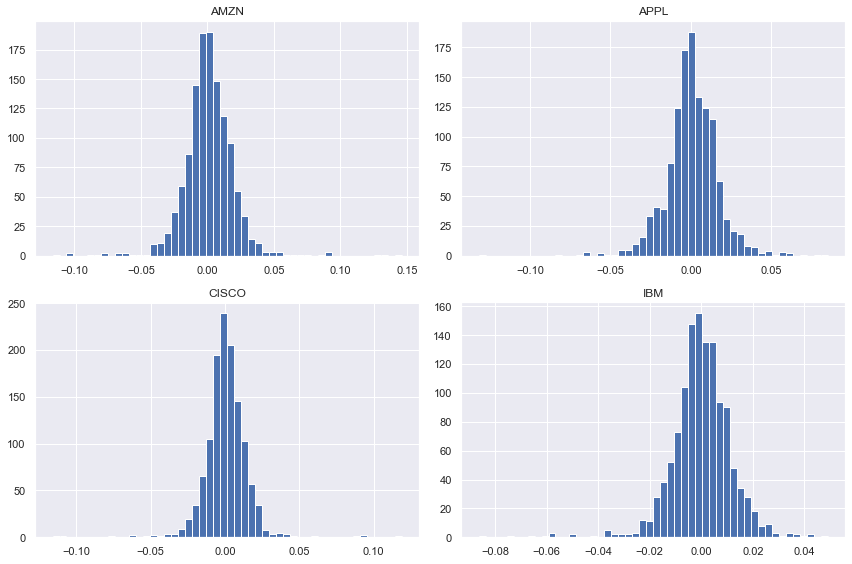

In [105]:
log_return.hist(bins=50,figsize=(12,8))
plt.tight_layout();

In [109]:
log_return.mean()

APPL     0.000614
CISCO    0.000497
IBM      0.000011
AMZN     0.001139
dtype: float64

In [111]:
# It's gonna be used later!
log_return.cov()*252

,APPL,CISCO,IBM,AMZN
APPL,0.068326,0.017854,0.014464,0.018986
CISCO,0.017854,0.051381,0.018029,0.019956
IBM,0.014464,0.018029,0.035203,0.014939
AMZN,0.018986,0.019956,0.014939,0.094470
